# <center> SIT764 2023 T1 HardHat Enterprises </center> 
# <center> Introduction to Python Matching Algorithm, Statistics, Visualisation </center>
### <center> v3.0 </center>
#### <center> by </center> 
# <center> Julia Axelrod 2220419973 </center>

email: jaxelrod@deakin.edu.au
##### Postgraduate (SIT764) student, julior cohort

***

![Python](https://www.python.org/static/img/python-logo.png)

*** Import Libaries and packages ***

In [1]:
import numpy as np  # imports the `numpy` package and sets an alias
import math # imports built-in module math which provides access to mathematical functions
import matplotlib.pyplot as plt  # basic plotting library
import seaborn as sns # package for data visualisation written by [Michael Waskom](https://mwaskom.github.io/)
import pandas as pd
from scipy import stats
from datetime import datetime, timedelta  
import calendar
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
pd.set_option("display.notebook_repr_html", False)  # disable "rich" output
import sqlite3
import timeit
plt.style.use('seaborn')
from array import *
print (pd.__version__ ) # FYI

conn = sqlite3.connect("/tmp/test5D.db")

1.4.4


*** Import Data - Volunteers and Organisations - from Excel ***   
*** Add data to numpy array Volunteers19_Ar and Organisations19_Ar for future processing. ***

In [2]:
Volunteers19 = pd.read_csv("C:\Deakin\SIT764-Presentation\\19Q_Volunteer.csv",comment="#")
Volunteers19.head(3)
Volunteers19_Ar = Volunteers19.to_numpy()
Volunteers19_Ar[:7, :]

array([[1, 'Bob', 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0],
       [2, 'Ahmed', 1, 0, 3, 2, 2, 2, 2, 2, 1, 0, 0, 3, 1, 3, 0, 0, 2, 1,
        2],
       [3, 'Alya', 3, 2, 3, 2, 0, 2, 1, 3, 1, 0, 1, 1, 0, 1, 2, 1, 3, 2,
        1],
       [4, 'Mary', 3, 3, 3, 0, 2, 1, 2, 0, 0, 2, 3, 2, 3, 3, 3, 3, 3, 1,
        3],
       [5, 'Jane', 1, 3, 2, 0, 1, 0, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 3,
        3],
       [6, 'Alonso', 2, 1, 1, 1, 1, 3, 2, 1, 0, 3, 1, 2, 0, 1, 0, 3, 1,
        1, 3],
       [7, 'Toto', 2, 0, 3, 3, 3, 2, 2, 1, 2, 1, 0, 2, 1, 3, 0, 1, 0, 2,
        0]], dtype=object)

In [3]:
Organisations19 = pd.read_csv("C:\Deakin\SIT764-Presentation\\19Q_Organization.csv",comment="#")
Organisations19.head(3)
Organisations19_Ar = Organisations19.to_numpy()
Organisations19_Ar[:7, :]

array([[1, 'Sponge Bobs Foam', 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1,
        0, 0, 1, 0, 1],
       [2, 'Ahmed Cats Vogue', 0, 0, 2, 1, 3, 1, 0, 2, 0, 0, 0, 0, 1, 0,
        1, 0, 2, 1, 0],
       [3, "Alya's Book Store", 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 2,
        1, 1, 2, 0, 1],
       [4, 'Mary - Physiotherapist', 2, 1, 2, 0, 0, 3, 2, 0, 1, 2, 0, 2,
        0, 0, 1, 0, 0, 2, 2],
       [5, 'Jane - Italian Shoes Direct', 0, 0, 1, 0, 0, 2, 1, 0, 0, 2,
        0, 1, 0, 0, 0, 2, 0, 0, 2],
       [6, 'Alonso - Gym', 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 3, 1, 0, 2, 1,
        0, 0, 0, 0],
       [7, 'Toto - Kung Fu Dojo', 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2,
        0, 1, 0, 0, 1, 1]], dtype=object)

*** Visualisation ***

*** Histogram, Q1, Q19 ***  
*** Plot histogram for Q1 or Q19 - sample visualisation ***  
***
Majority of organisations have maturity level 2,  
Majority of Volunteers have skill level 3 
We have enough skills to cover the demand - in this sample.


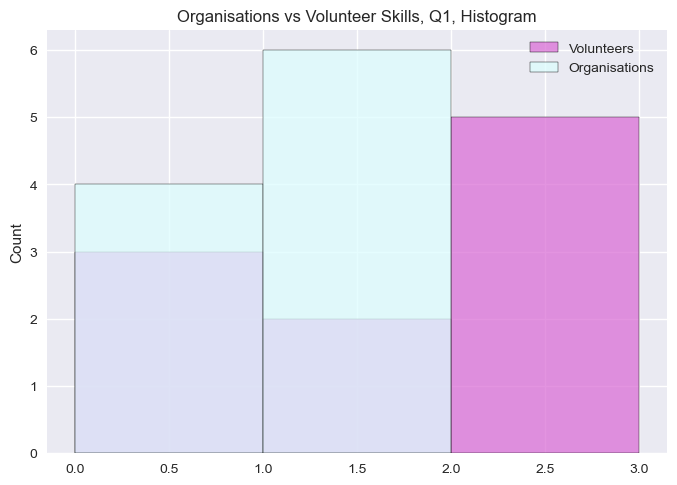

In [4]:
sns.histplot(Volunteers19_Ar[:, 2], color = '#DA70D6', label = 'Volunteers', bins = 4, binwidth = 1) # '#ffc8db'
sns.histplot(Organisations19_Ar[:, 2], color = '#ddfdfe', label = 'Organisations', bins = 4, binwidth = 1) # cyan
plt.title ("Organisations vs Volunteer Skills, Q1, Histogram")
plt.legend()
plt.show()

In [5]:
def printHistogram (QQ):
    sns.histplot(Volunteers19_Ar[:, QQ], color = '#DA70D6', label = 'Volunteers', bins = 4, binwidth = 1) # '#ffc8db'
    sns.histplot(Organisations19_Ar[:, QQ], color = '#ddfdfe', label = 'Organisations', bins = 4, binwidth = 1) # cyan
    plt.title ("Orgs vs Volunteer Skills, Q" + f"{QQ}")
    plt.legend()
    plt.show()

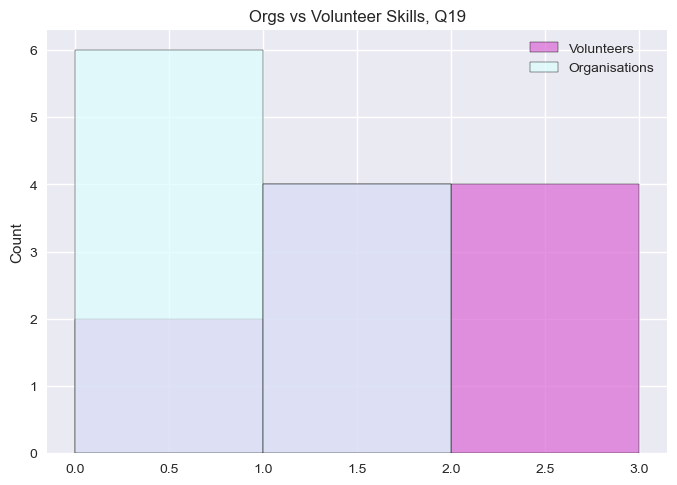

In [6]:
printHistogram (19)

*** Histogram, three questions side - by - side ***

***

By comparing various questions we can visualise Maturity levels vs Skills offered across three different areas.
We see the skew, which tells us how maturity levels and skill levels are distributed and we can plan accordingly.


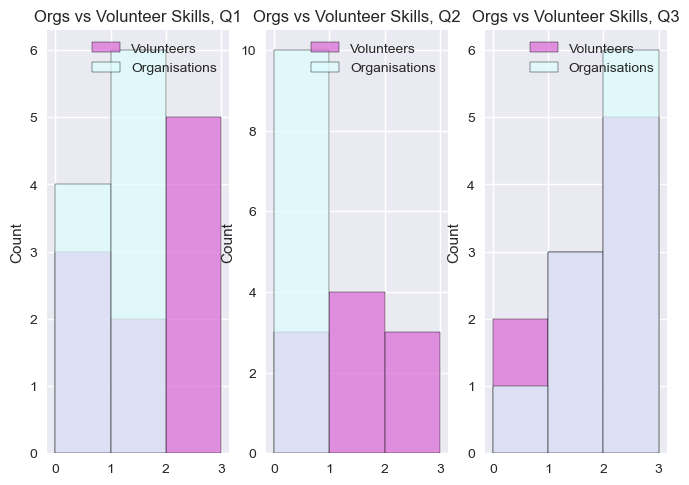

In [7]:
i = 1
j = 3
k = 1

while (k <= j):

    plt.subplot (i,j,k)

    sns.histplot(Volunteers19_Ar[:, k + 1], color = '#DA70D6', label = 'Volunteers', bins = 4, binwidth = 1) # '#ffc8db'
    sns.histplot(Organisations19_Ar[:, k + 1], color = '#ddfdfe', label = 'Organisations', bins = 4, binwidth = 1) # cyan
    plt.title ("Orgs vs Volunteer Skills, Q" + f"{k}")
    plt.legend()
    k = k + 1

plt.show()



*** Histgram - all levels vs all skills ***

***

By comparing various questions we can visualise Maturity levels vs Skills offered across all 19 areas. We see the skew, which tells us how maturity levels and skill levels are distributed and we can plan accordingly.
The histograms use 19 different colours making it easy to identify corresponding values.

10


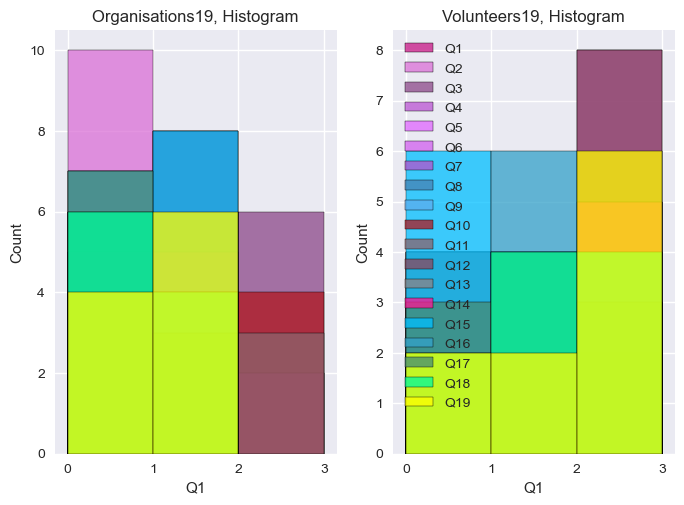

In [5]:
# Let's visualise first:

QQ_measures = ([ 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
       'Q18', 'Q19'])
Colours = (['#C71585','#DA70D6', '#8B4789','#BA55D3','#E066FF','#D15FEE', '#B452CD','#4682B4', '#5CACEE', '#B0171F',
           '#8B636C','#8B475D', '#8B8386', '#FF1493','#00BFFF','#33A1C9', '#458B74', '#00FA9A', '#FFFF00', '#8B8B00',
           '#8B6914','#FF9912','#8B4500', '#C81585','#DA80D6', '#8F4789','#BD55D3','#E966FF','#D10FEE', '#B492CD','#4692B4', '#5CACEE', '#B0171F',
           '#8B636C','#8B475D', '#8B8386', '#FF1493','#00BFFF','#33A1C9', '#458B74', '#00FA9A', '#FFFF00', '#8B8B00',
           '#8B6914','#FF9912','#8B4500'])

print (len (Organisations19))

i = 0
while i < (len(QQ_measures)) :
    plt.subplot (121)
    sns.histplot(data = Organisations19, x = QQ_measures[i],color = Colours[i], 
                 label = QQ_measures[i], log_scale = False, bins = 4,  binwidth = 1) #bins = 4, 
    plt.title ("Organisations19, Histogram")
    plt.subplot (122)
    sns.histplot(data = Volunteers19, x = QQ_measures[i],color = Colours[i], 
                 label = QQ_measures[i], log_scale = False, bins = 4, binwidth = 1) 
    plt.title ("Volunteers19, Histogram")
    i = i + 1
# plt.title ("Organisations19, Histogram")

plt.legend()
plt.show()



*** Pairplot - Organisations, Vlounteers ***

By comparing various questions we can visualise Maturity levels vs Skills offered across each 19 areas. We see the skew, and the distribution which tells us how maturity levels and skill levels are distributed for each individual question and full scope at a glance and we can plan accordingly.

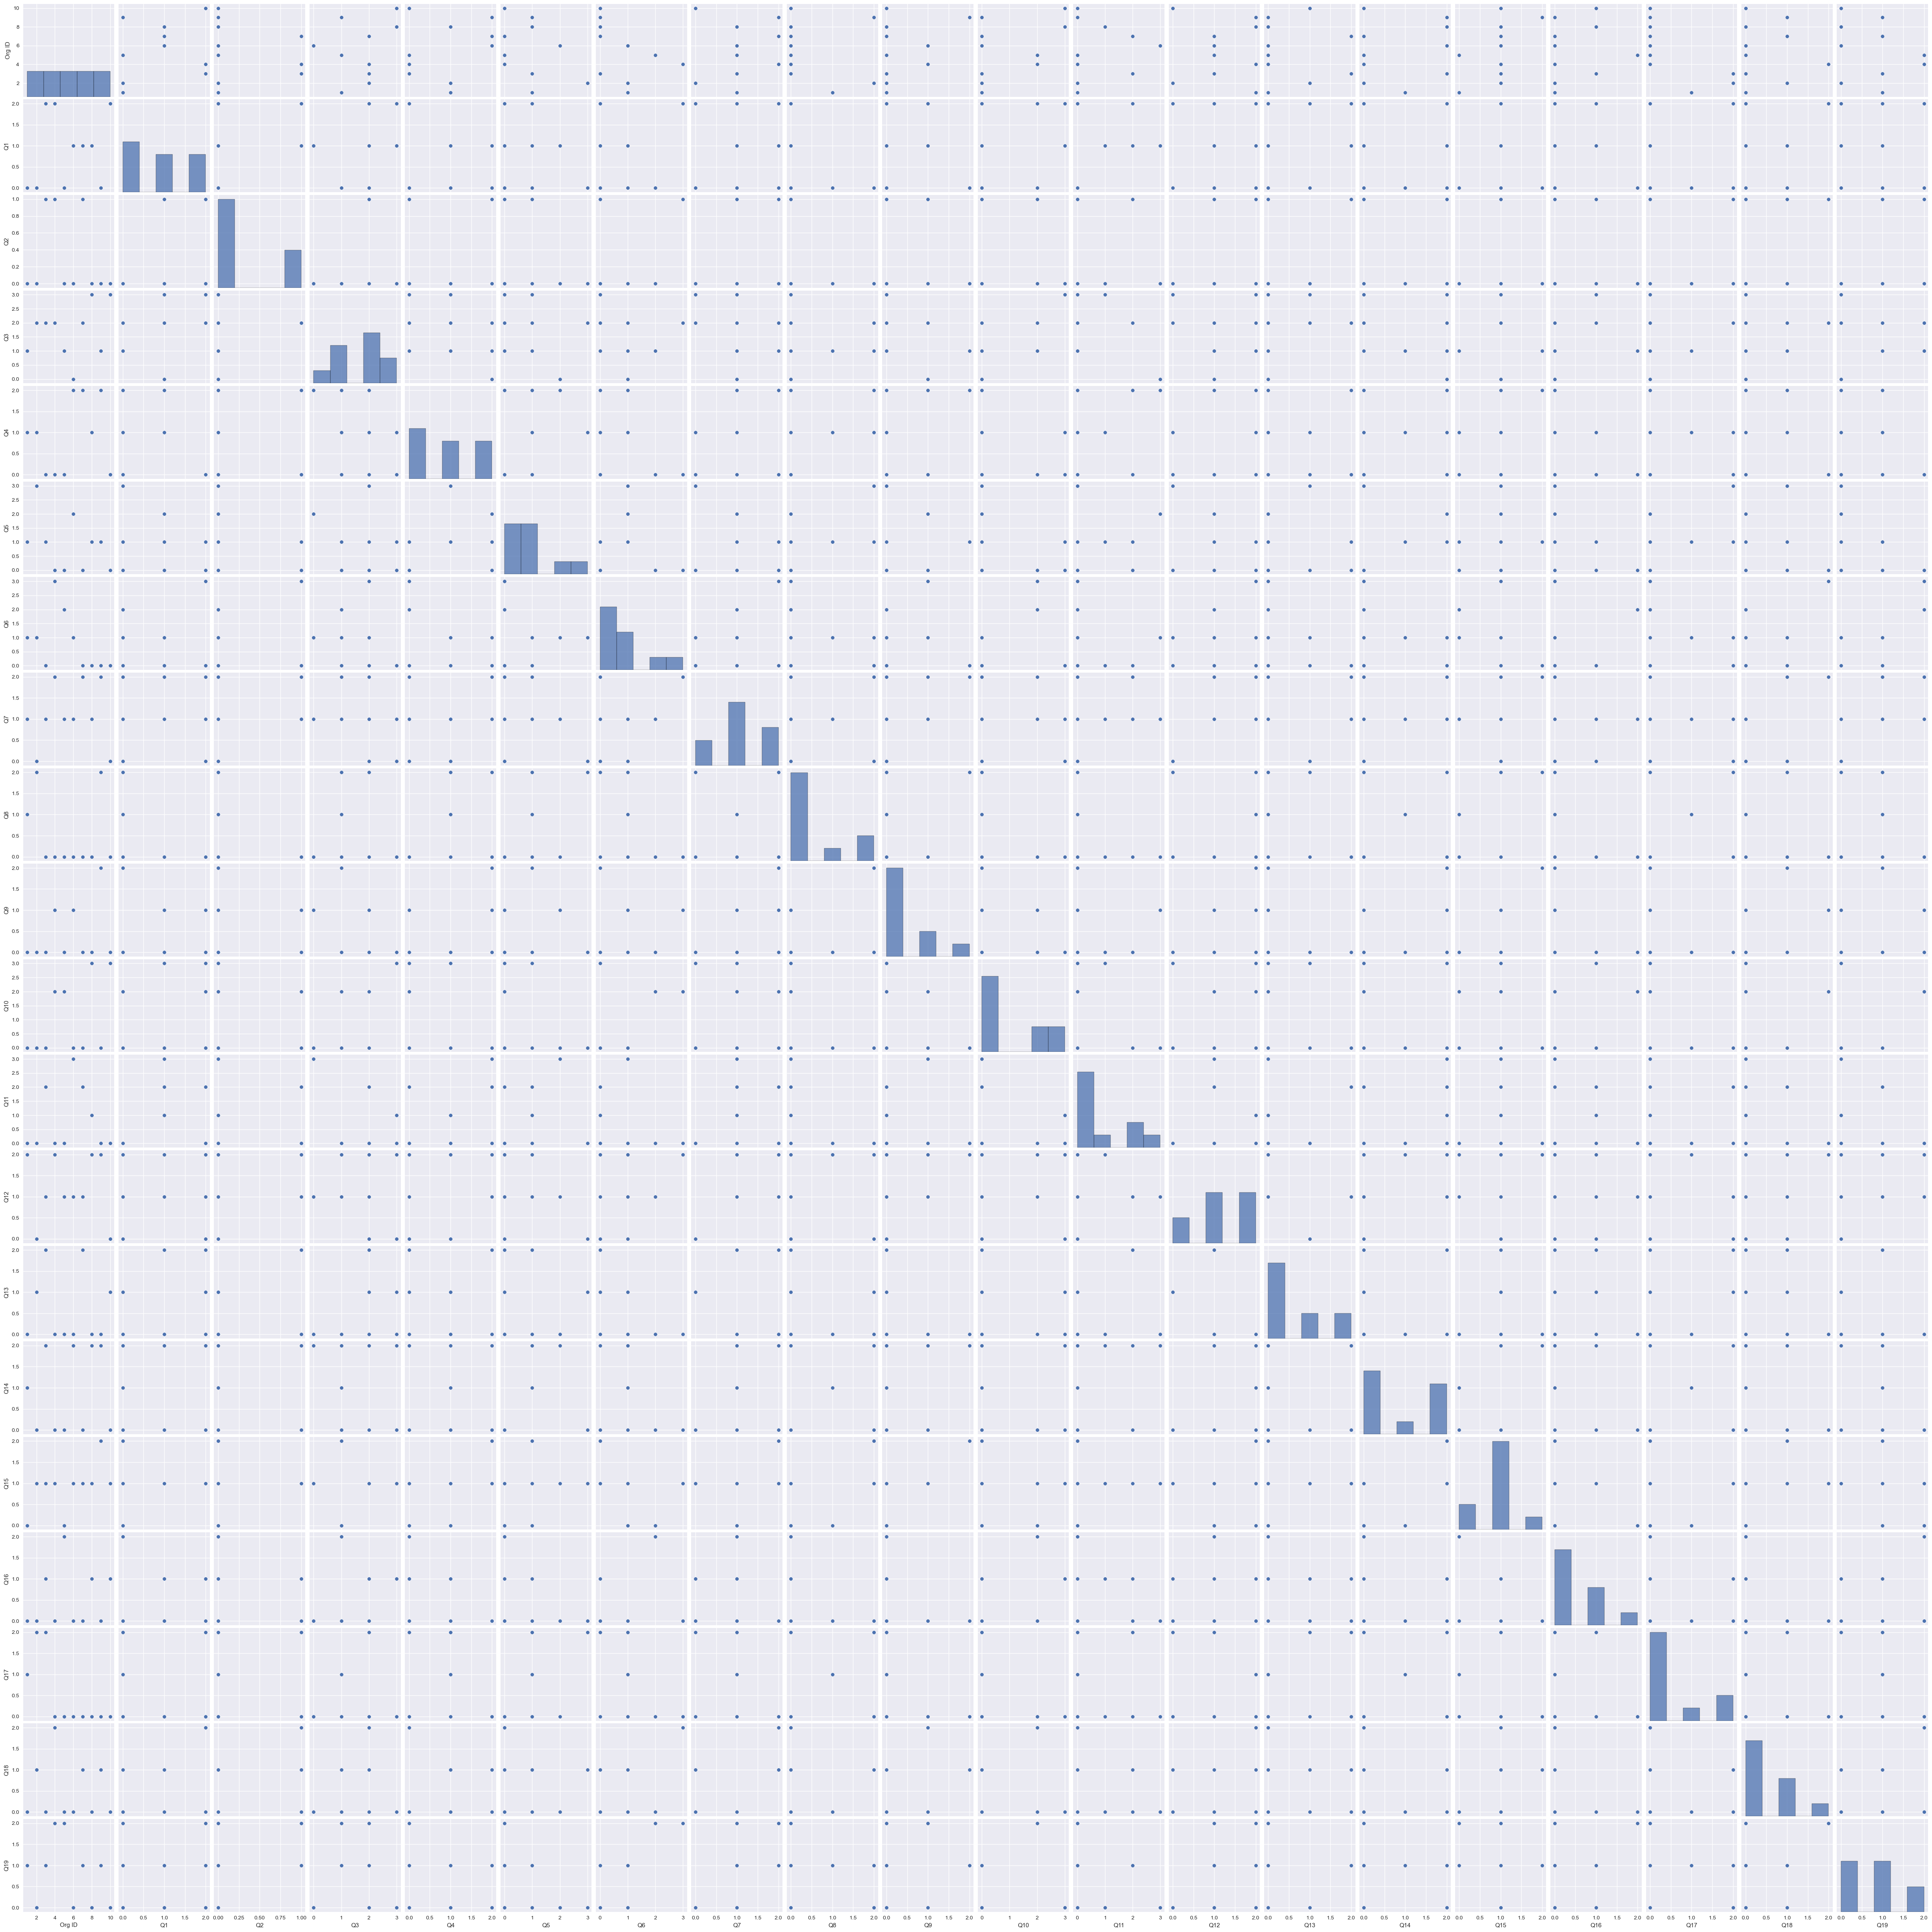

In [7]:
sns.pairplot(Organisations19)

plt.show()

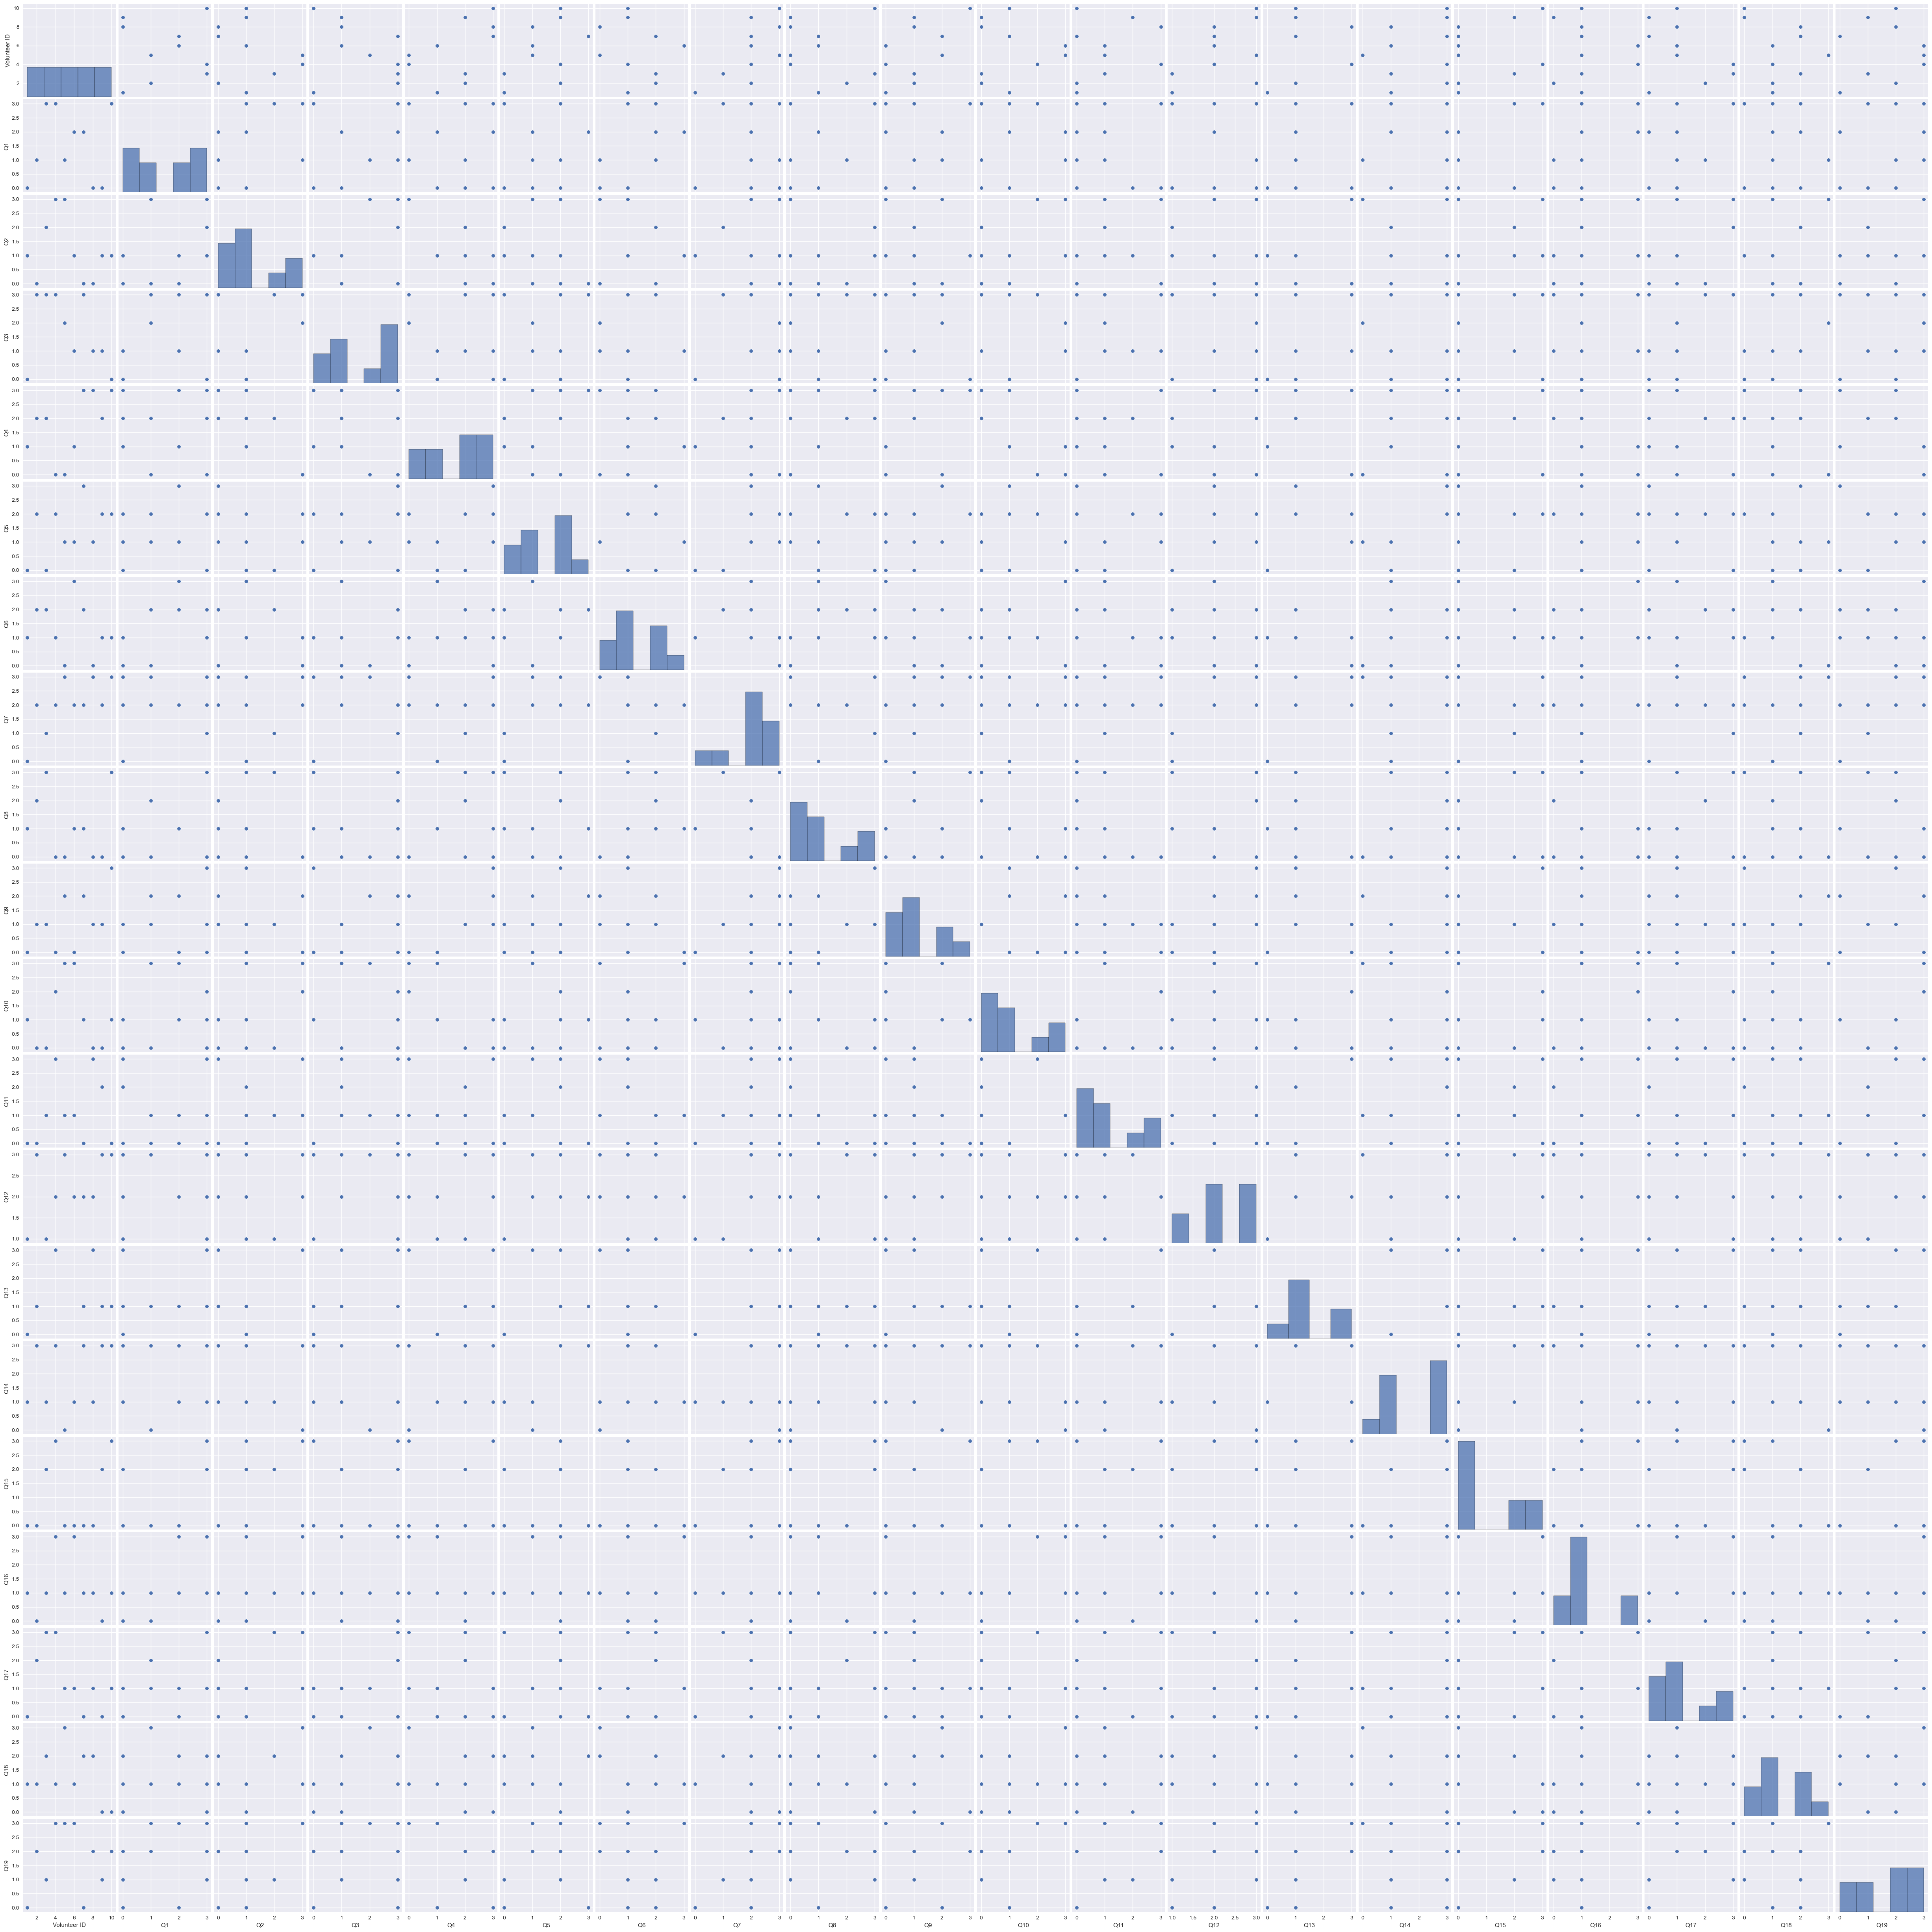

In [125]:
sns.pairplot(Volunteers19)

plt.show()

*** Matching algorithm - cycle through questions and match volunteers, where skill is greater than 1 and is greater than that of Organisation ***

***
For each organisation, cycle through all questions.  
For each question, cycle through all volunteers.  
Volunteers, whose skill level matches the required,are added to three arrays:  
 - score2[] - for those whose skill level is 2  
 - score3[]- for those whose skill level is 3 
 - advisory[] - for those who match requirement for Q14 - average score is greater than 2
 
Then, using sorting function pickBestAdvisor(arr), suitable volunteers are listed in the order of their overall scores, descending.

In [16]:
# match Q1 (Org) to Q1 (Volun).... Q19 (Org) to Q19 (Volun)

i = 0  # Cycle through all organisations
while i < (len (Organisations19)):  # 10 orgs
    print ('\n', Organisations19_Ar[i][0], Organisations19_Ar[i][1],'\n' )

    j = 2 # Cycle through all questions for all volunteers by question, for each organisation
    while (j < len(Volunteers19_Ar[i])) :
        score2 = []
        score3 = []
        advisory = []
        k = 0 # Cycle through all volunteers for each organisation

        while (k < len (Volunteers19)): # 10 Voluns

            # Cycle through ONE question for ALL volunteers, assign 2 to score2[], 3 - to score3[], advisory
          
            if (j != 15 and Volunteers19_Ar[k][j] > 1 and Volunteers19_Ar[k][j] > Organisations19_Ar[i][j]):
                    print ("Q" + f"{j -1}", Volunteers19_Ar[k][0],Volunteers19_Ar[k][1]," Score: ", Volunteers19_Ar[k][j])
                    if (Volunteers19_Ar[k][j] == 2) :
                        score2.append (Volunteers19_Ar[k][0])
                    else :
                        score3.append (Volunteers19_Ar[k][0])
                        
            elif (j == 15 and getVolunteerAverageScore(k) > 2) :
                advisory.append (Volunteers19_Ar[k][0])
                print ("For Q14 Check Average score = it must be > 32")
#                 print ("Total Score: ", getVolunteerTotalScore (k))
                print ("Average Score: ", getVolunteerAverageScore(k))

            
            k = k + 1
        
        if (len(score3) > 0) :
            print('\n')
            print ('score 3', score3)
            pickBestAdvisor (score3)
        elif (len(score2) > 0) :
            print('\n')
            print ('score 2', score2)
            pickBestAdvisor (score2)
        elif (j != 15 ): 
            print('\n')
            print('We do not have qualified volunteers at this time')
        else :
            pickBestAdvisor (advisory) 
        print ('\n')    
        j = j + 1

    i = i + 1
print ("Done")


 1 Sponge Bobs Foam 

Q1 3 Alya  Score:  3
Q1 4 Mary  Score:  3
Q1 6 Alonso  Score:  2
Q1 7 Toto  Score:  2
Q1 10 Mark  Score:  3


score 3 [3, 4, 10]

Our Best Advisors:

_________________
4, ID 4 Name Mary
10, ID 10 Name Mark
3, ID 3 Name Alya




Q2 3 Alya  Score:  2
Q2 4 Mary  Score:  3
Q2 5 Jane  Score:  3


score 3 [4, 5]

Our Best Advisors:

_________________
4, ID 4 Name Mary
5, ID 5 Name Jane




Q3 2 Ahmed  Score:  3
Q3 3 Alya  Score:  3
Q3 4 Mary  Score:  3
Q3 5 Jane  Score:  2
Q3 7 Toto  Score:  3


score 3 [2, 3, 4, 7]

Our Best Advisors:

_________________
4, ID 4 Name Mary
3, ID 3 Name Alya
7, ID 7 Name Toto
2, ID 2 Name Ahmed




Q4 2 Ahmed  Score:  2
Q4 3 Alya  Score:  2
Q4 7 Toto  Score:  3
Q4 8 Tula  Score:  3
Q4 9 Romeo  Score:  2
Q4 10 Mark  Score:  3


score 3 [7, 8, 10]

Our Best Advisors:

_________________
10, ID 10 Name Mark
7, ID 7 Name Toto
8, ID 8 Name Tula




Q5 2 Ahmed  Score:  2
Q5 4 Mary  Score:  2
Q5 7 Toto  Score:  3
Q5 9 Romeo  Score:  2
Q5 10 Mark

In [11]:
# Add all scores to calculate total volunteer score

def getVolunteerTotalScore (ID):
    i = 2
    Score = 0
    while (i < len(Volunteers19_Ar[ID])) :
        Score = Score + Volunteers19_Ar[ID][i]
        i = i + 1
    return (Score)

In [1]:
# Divide total volunteer score by 19 to get average volunteer score

def getVolunteerAverageScore (ID):
    
    return (getVolunteerTotalScore (ID) / 19)

In [2]:
# Use argsort to sort array in descending order

def pickBestAdvisor (score) :

    sortTotalScore = []
    for i in score:
#         print(i, end=', ')
        sortTotalScore.append(getVolunteerTotalScore (i - 1))
    B = np.array (sortTotalScore)

    sort_index = np.argsort(-1*B)
#     print ('\nsortTotalScore', sortTotalScore)
#     print ('sorted Index', sort_index)
    print ('\nOur Best Advisors:')
    print ('\n_________________')
    for i in sort_index:
        print(score[i], end=', ')
        print ('ID', Volunteers19_Ar[score[i]-1][0],'Name', Volunteers19_Ar[score[i]-1][1])
    print ('\n')


*** Test sort Volunteers by Total Score  function ***

In [14]:
score = array('i', [1,2,3,4,5,6,7,8,9,10])
pickBestAdvisor(score)


Our Best Advisors:

_________________
4, ID 4 Name Mary
10, ID 10 Name Mark
3, ID 3 Name Alya
7, ID 7 Name Toto
2, ID 2 Name Ahmed
5, ID 5 Name Jane
6, ID 6 Name Alonso
8, ID 8 Name Tula
9, ID 9 Name Romeo
1, ID 1 Name Bob




### Analytics ###

*** Cosine Similarity Matrix ***

This section below presents analysis which is about the similarities of levels between the two groups. For this type of analysis we are interested to select Volunteers, which respond to questionnaire in a similar  way, aligning best with Organisation. This is well represented by the concept of cosine similarity which allow to consider as “close” those ‘observations’ aligned to some interesting for us directions regardless of how different the magnitude of the measures are from each other.

We calculate cosine similarity between the organisation and volunteers first, then we repat the same, having added 1 to each answer below 3. The idea behind it being that volunteer needs to be able to elevate the organisation to the next maturity level. The similarity in this aspect will mean that the volunteer best match developed experience in the areas that the organisation has been developing already. It will reflect well on the overall company direction, as some aspects, no matter how important, may not be relevant for a specific organisation.


In [9]:
# Cosine similarity matrix function
def cosSimMatrix(A,B):
    num=np.dot(A,B.T)
    p1=np.sqrt(np.sum(A**2,axis=1))[:,np.newaxis]
    p2=np.sqrt(np.sum(B**2,axis=1))[np.newaxis,:]
    return num/(p1*p2)

In [16]:
# Calculate Cosine Similarity for organisation #i and all Volunteers - raw
# Add 1 to each score < 3 for Organisation and then 
# Calculate Cosine Similarity for organisation #i and all Volunteers - as we want o upgrade Org posture.
def csm(i) :
    C = Volunteers19_Ar[:, 2:].astype(np.float32)
    D = Organisations19_Ar[i-1:i, 2:].astype(np.float32)
    D[D != 3] += 1

    print ("Cosine Similarity Matrix - raw")
    print (cosSimMatrix(D,C))
    
    print ("\nCosine Similarity Matrix - for best Volunteer selection:")
    print(cosSimMatrix(Organisations19_Ar[i-1:i, 2:].astype(np.float32),Volunteers19_Ar[:, 2:].astype(np.float32)))

In [17]:
# Call csm for Organisation #1:

csm (1)

Cosine Similarity Matrix - raw
[[0.6804138  0.9389727  0.80580634 0.79876876 0.7148817  0.8111071
  0.83350694 0.7407407  0.8206099  0.8511025 ]]

Cosine Similarity Matrix - for best Volunteer selection:
[[0.5547002  0.9388056  0.6289709  0.5604486  0.54213935 0.66124654
  0.72804403 0.60388106 0.75261784 0.7177783 ]]


*** Correlation ***

In [19]:
# Correlation matrix function
def correlationMatrix(A,B,corr):
    if corr:
        B=B-B.mean(axis=1)[:,np.newaxis]
        A=A-A.mean(axis=1)[:,np.newaxis]
    num=np.dot(A,B.T)
    p1=np.sqrt(np.sum(A**2,axis=1))[:,np.newaxis]
    p2=np.sqrt(np.sum(B**2,axis=1))[np.newaxis,:]
    return num/(p1*p2)

In [21]:
def corrM (i) :
    E = Volunteers19_Ar[:, 2:].astype(np.float32)
    F = Organisations19_Ar[i-1:i, 2:].astype(np.float32)
    F[F != 3] += 1
    
    print ("Correlation Matrix - raw")
    print (correlationMatrix(F,E,True))
    
    print ("\nCorrelation Matrix - for best Volunteer selection:")
    print(correlationMatrix(Organisations19_Ar[i-1:i, 2:].astype(np.float32),
                            Volunteers19_Ar[:, 2:].astype(np.float32),True))

In [23]:
# Call correlation for Organisation #1:

corrM(1)

Correlation Matrix - raw
[[ 0.14085904  0.8864166   0.10859697 -0.17180245  0.02673701  0.2130716
   0.39004457  0.16798422  0.47483572  0.33412936]]

Correlation Matrix - for best Volunteer selection:
[[ 0.14085905  0.8864167   0.10859694 -0.1718025   0.02673705  0.21307161
   0.39004457  0.16798423  0.47483572  0.3341294 ]]


conclusion